In [16]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import HTML
from collections import OrderedDict
import warnings
import os

warnings.filterwarnings('ignore')
sns.set()

%matplotlib inline

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)



# Data Setup

Stackoverflow developer survey is comprehensive and has been evolving over the years. Their webiste provides data from 2011 to 2019 with slight modifications in questions/data collection year-over-year. In this project, We'll be focusing mainly on  technical skills and programming languages for the year 2019. First, we'll look at columns/fields available in the data. 

In [17]:
#Read the data
data = pd.read_csv("2019_Data/survey_results_public_2019.csv",encoding = "ISO-8859-1")
cols = list(data.columns)

data.shape

(88883, 85)

Every row corresponds to responses from one respondent. We have a total of 88,883 respondents

In [18]:
# Different quations answered by respondents
cols

['Respondent',
 'MainBranch',
 'Hobbyist',
 'OpenSourcer',
 'OpenSource',
 'Employment',
 'Country',
 'Student',
 'EdLevel',
 'UndergradMajor',
 'EduOther',
 'OrgSize',
 'DevType',
 'YearsCode',
 'Age1stCode',
 'YearsCodePro',
 'CareerSat',
 'JobSat',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'JobSeek',
 'LastHireDate',
 'LastInt',
 'FizzBuzz',
 'JobFactors',
 'ResumeUpdate',
 'CurrencySymbol',
 'CurrencyDesc',
 'CompTotal',
 'CompFreq',
 'ConvertedComp',
 'WorkWeekHrs',
 'WorkPlan',
 'WorkChallenge',
 'WorkRemote',
 'WorkLoc',
 'ImpSyn',
 'CodeRev',
 'CodeRevHrs',
 'UnitTests',
 'PurchaseHow',
 'PurchaseWhat',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'WebFrameWorkedWith',
 'WebFrameDesireNextYear',
 'MiscTechWorkedWith',
 'MiscTechDesireNextYear',
 'DevEnviron',
 'OpSys',
 'Containers',
 'BlockchainOrg',
 'BlockchainIs',
 'BetterLife',
 'ITperson',
 'OffOn',
 'SocialMedia',
 'Ext

In [19]:
# Data summary
data.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [20]:
# Sample Data
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelorâs degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelorâs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelorâs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


Now that we have the initial cut of how the data looks like, let us try and answer some questions.

# What are the most popular programming skill among all developers?

In [22]:
langs_counts = data.groupby([data.LanguageWorkedWith]).Respondent \
                .count() \
                .reset_index(name='count') \
                .sort_values(['count'], ascending=False)
                
langs_counts

,LanguageWorkedWith,count
19038,HTML/CSS;JavaScript;PHP;SQL,1483
12685,C#;HTML/CSS;JavaScript;SQL,1414
18862,HTML/CSS;JavaScript,1247
12690,C#;HTML/CSS;JavaScript;SQL;TypeScript,990
19331,Java,934
...,...,...
9041,Bash/Shell/PowerShell;Clojure;HTML/CSS;JavaScr...,1
9042,Bash/Shell/PowerShell;Clojure;HTML/CSS;JavaScr...,1
9043,Bash/Shell/PowerShell;Clojure;HTML/CSS;JavaScr...,1
9044,Bash/Shell/PowerShell;Clojure;HTML/CSS;JavaScr...,1


HTML/CSS;JavaScript;PHP;SQL looks like the most common skillset which aligns with the Full Stack Developer skillset. 

In [23]:
# Check for null values
print ('Null Reponses ', data.LanguageWorkedWith.isnull().sum())

# Exclude rows with no responses for LanguageWorkedWith
languages_df = data[(data.LanguageWorkedWith.isnull() == False)]
languages_df.LanguageWorkedWith.describe()

Null Reponses  1314


count                           87569
unique                          20098
top       HTML/CSS;JavaScript;PHP;SQL
freq                             1483
Name: LanguageWorkedWith, dtype: object

As we can see here, Java seems to be the most popular langugae in terms of one individual language. However, the data seemes to be concatenation of multiple languages. To get a clear grouping by individual language we will have to parse the 'LanguageWorkedWith' column to induvidual languages. 

In [24]:
#Split responses to individual languages

def split_responses(df, column):
    df[column] = df[column].str.replace(';',',')
    #print (languages_df.languages_df.head)
    response_dict = {}


    for index, row in df.iterrows():
        for i in row[column].split(','):
                if i.strip() not in response_dict:
                    response_dict[i.strip()] = 1
                else :
                    response_dict[i.strip()] += 1
    return response_dict
           

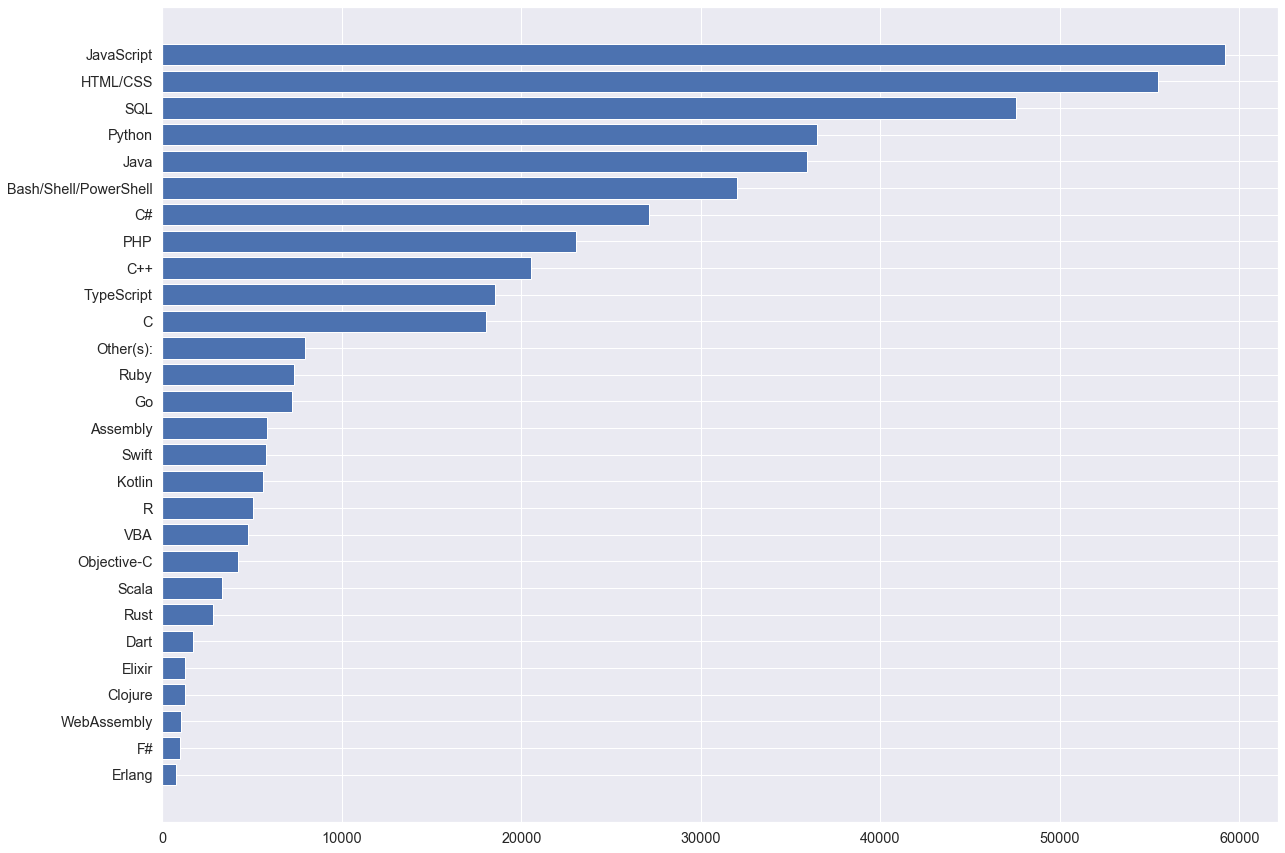

In [25]:
# Bar plot for indivisual languages worked with
fig= plt.figure(figsize=(20,15))
prog_langs = split_responses(languages_df, 'LanguageWorkedWith')
sorted_prog_langs = OrderedDict(sorted(prog_langs.items(), key=lambda x: x[1], reverse= True))
plt.barh(list(sorted_prog_langs.keys())[:50], list(sorted_prog_langs.values())[:50], align='center')
plt.gca().invert_yaxis()
plt.show()

JavaScript, HTML/CSS, SQL, Python, Java are the top 5 programming languages used by developers in this survey. C & C++ are less popular.

# What are the most popular job roles?

In [27]:
job_counts = data.groupby([data.DevType]).Respondent \
                .count() \
                .reset_index(name='count') \
                .sort_values(['count'], ascending=False)
                
job_counts

,DevType,count
12675,"Developer, full-stack",8433
9987,"Developer, back-end",4913
11180,"Developer, back-end;Developer, front-end;Devel...",2399
12468,"Developer, front-end",2212
12998,"Developer, mobile",2172
...,...,...
4799,"Data or business analyst;Developer, back-end;D...",1
4800,"Data or business analyst;Developer, back-end;D...",1
4801,"Data or business analyst;Developer, back-end;D...",1
4802,"Data or business analyst;Developer, back-end;D...",1


In [28]:
# Check for null values
print ('Null Reponses ', data.DevType.isnull().sum())

# Exclude rows with no responses for DevType
jobs_df = data[(data.DevType.isnull() == False)]
jobs_df.DevType.describe()

Null Reponses  7548


count                     81335
unique                    13141
top       Developer, full-stack
freq                       8433
Name: DevType, dtype: object

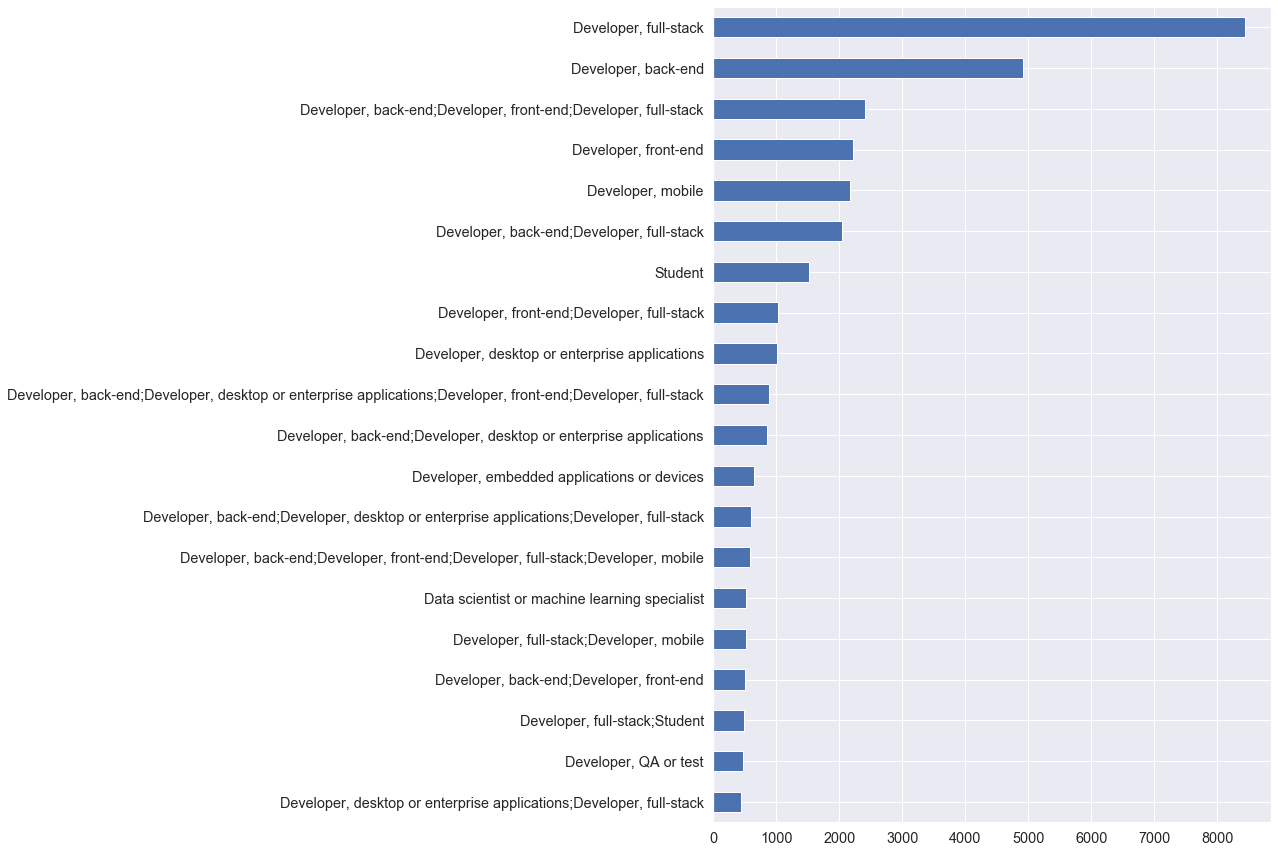

In [29]:
fig= plt.figure(figsize=(10,15))
(jobs_df.DevType.value_counts().nlargest(20)).plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.show()

## Data Scientists vs. Non - Data Scientists

In [30]:
# Categorize job roles

jobs_df.loc[jobs_df.DevType.str.contains('Data scientist or machine learning specialist')==True, 'RoleCategory'] = 'Data Science Role'
jobs_df.loc[jobs_df.DevType.str.contains('Data scientist or machine learning specialist')==False , 'RoleCategory'] = 'Non - Data Science Role'

print (jobs_df.RoleCategory.value_counts())
print ('--------------------------------------')
print (100. * jobs_df.RoleCategory.value_counts() / len(jobs_df.RoleCategory))


Non - Data Science Role    74875
Data Science Role           6460
Name: RoleCategory, dtype: int64
--------------------------------------
Non - Data Science Role    92.05754
Data Science Role           7.94246
Name: RoleCategory, dtype: float64


# What age groups do the data scientists belong to?

In [31]:
jobs_df['AgeCategory'] = pd.cut(x=jobs_df['Age'].astype(float), bins=[0, 20 ,30, 40, 50, 60])

# Create a summary by age & role
age_data_pivot = jobs_df[jobs_df.Age.isnull()==False].groupby(['RoleCategory','AgeCategory'])['Respondent'].nunique()
age_data_pivot = (age_data_pivot/age_data_pivot.groupby(level=0).sum()*100).reset_index().sort_values('Respondent', ascending = False)

age_data_pivot

,RoleCategory,AgeCategory,Respondent
1,Data Science Role,"(20, 30]",55.437249
6,Non - Data Science Role,"(20, 30]",52.909739
7,Non - Data Science Role,"(30, 40]",29.550178
2,Data Science Role,"(30, 40]",28.277186
8,Non - Data Science Role,"(40, 50]",8.793052
3,Data Science Role,"(40, 50]",8.657706
5,Non - Data Science Role,"(0, 20]",5.918943
0,Data Science Role,"(0, 20]",4.974690
9,Non - Data Science Role,"(50, 60]",2.828088
4,Data Science Role,"(50, 60]",2.653168


In [32]:
#Pivot view by age group
age_data_splitted_pivot = age_data_pivot.pivot_table('Respondent','AgeCategory', 'RoleCategory').reset_index().sort_values("AgeCategory", ascending = True)
age_data_splitted_pivot

RoleCategory,AgeCategory,Data Science Role,Non - Data Science Role
0,"(0, 20]",4.974690,5.918943
1,"(20, 30]",55.437249,52.909739
2,"(30, 40]",28.277186,29.550178
3,"(40, 50]",8.657706,8.793052
4,"(50, 60]",2.653168,2.828088


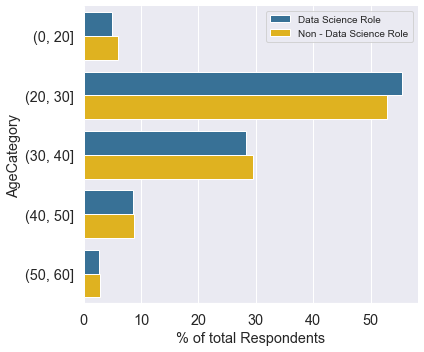

In [33]:
colors = {'Data Science Role': "#2874A6", 'Non - Data Science Role': "#FFC300"}
g = sns.catplot(x="Respondent", y="AgeCategory", hue="RoleCategory", data = age_data_pivot,
                kind="bar", palette=colors, aspect=1.2,legend = False)
g.despine(left=True)
plt.legend(loc='upper right', fontsize = 10)
g.set_ylabels("AgeCategory")
g.set_xlabels("% of total Respondents")

# How does gender breakdown for Data Scientists look like ?

In [34]:
#Gender
gender_data_pivot = jobs_df[jobs_df.Gender.isnull()==False].groupby(['RoleCategory','Gender'])['Respondent'].nunique()
gender_data_pivot = (gender_data_pivot/gender_data_pivot.groupby(level=0).sum()*100).reset_index().sort_values('Respondent', ascending = False)

gender_data_pivot

,RoleCategory,Gender,Respondent
7,Non - Data Science Role,Man,91.448148
0,Data Science Role,Man,90.438120
3,Data Science Role,Woman,7.771027
10,Non - Data Science Role,Woman,7.340006
2,Data Science Role,"Non-binary, genderqueer, or gender non-conforming",0.799488
9,Non - Data Science Role,"Non-binary, genderqueer, or gender non-conforming",0.636943
4,Data Science Role,Woman;Man,0.335785
1,Data Science Role,"Man;Non-binary, genderqueer, or gender non-con...",0.303806
8,Non - Data Science Role,"Man;Non-binary, genderqueer, or gender non-con...",0.199906
6,Data Science Role,"Woman;Non-binary, genderqueer, or gender non-c...",0.191877


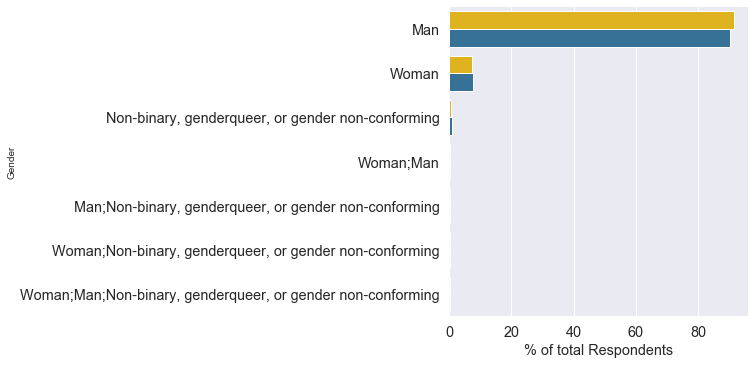

In [35]:

g = sns.catplot(x="Respondent", y="Gender", hue="RoleCategory", data = gender_data_pivot,
                kind="bar", palette=colors, aspect=1,legend = False)
g.despine(left=True)
g.set_ylabels("Gender", fontsize = 10)
g.set_xlabels("% of total Respondents")

# What programming langugaesdo data scientists mostly work with?

In [36]:
langs_data = jobs_df[jobs_df.DevType.isnull()==False].pivot_table("Respondent", "RoleCategory", "LanguageWorkedWith", aggfunc = 'count').T.reset_index()
langs_data['% of DS Total'] = round((langs_data["Data Science Role"] * 100 / langs_data["Data Science Role"].sum()),2).astype(str) + '%'
langs_data['% of NonDS Total'] = round((langs_data["Non - Data Science Role"] * 100 / langs_data["Non - Data Science Role"].sum()),2).astype(str) + '%'

langs_data

RoleCategory,LanguageWorkedWith,Data Science Role,Non - Data Science Role,% of DS Total,% of NonDS Total
0,Assembly,9.0,31.0,0.14%,0.04%
1,Assembly;Bash/Shell/PowerShell,1.0,5.0,0.02%,0.01%
2,Assembly;Bash/Shell/PowerShell;C,NaN,14.0,nan%,0.02%
3,Assembly;Bash/Shell/PowerShell;C#;Clojure;Go;J...,NaN,1.0,nan%,0.0%
4,Assembly;Bash/Shell/PowerShell;C#;Clojure;HTML...,NaN,1.0,nan%,0.0%
...,...,...,...,...,...
18747,TypeScript,NaN,13.0,nan%,0.02%
18748,TypeScript;Other(s):,NaN,2.0,nan%,0.0%
18749,VBA,4.0,32.0,0.06%,0.04%
18750,VBA;Other(s):,NaN,12.0,nan%,0.02%


In [37]:
langs_data_split = jobs_df[jobs_df.LanguageWorkedWith.isnull()==False][['Respondent','RoleCategory','LanguageWorkedWith']]

In [38]:
# Splitting responses another approach compared to the previous one.

langs_data_splitted = \
(langs_data_split.set_index(langs_data_split.columns.drop('LanguageWorkedWith',1).tolist())
   .LanguageWorkedWith.str.split(';', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'LanguageWorkedWith'})
   .loc[:, langs_data_split.columns]
)

In [39]:
langs_data_pivot = langs_data_splitted.groupby(['RoleCategory','LanguageWorkedWith'])['Respondent'].nunique()
langs_data_pivot = (langs_data_pivot/langs_data_pivot.groupby(level=0).sum()*100).reset_index().sort_values('Respondent', ascending = False)

langs_data_pivot

,RoleCategory,LanguageWorkedWith,Respondent
18,Data Science Role,Python,14.568765
41,Non - Data Science Role,JavaScript,14.060294
39,Non - Data Science Role,HTML/CSS,12.975576
50,Non - Data Science Role,SQL,11.108501
22,Data Science Role,SQL,10.731139
13,Data Science Role,JavaScript,9.434874
11,Data Science Role,HTML/CSS,9.261470
1,Data Science Role,Bash/Shell/PowerShell,8.169879
40,Non - Data Science Role,Java,8.163728
46,Non - Data Science Role,Python,7.413767


In [40]:
langs_data_splitted_pivot = langs_data_pivot.pivot_table('Respondent','LanguageWorkedWith', 'RoleCategory').reset_index().sort_values("Data Science Role", ascending = False)
langs_data_splitted_pivot 

RoleCategory,LanguageWorkedWith,Data Science Role,Non - Data Science Role
18,Python,14.568765,7.413767
22,SQL,10.731139,11.108501
13,JavaScript,9.434874,14.060294
11,HTML/CSS,9.261470,12.975576
1,Bash/Shell/PowerShell,8.169879,7.234780
12,Java,6.973108,8.163728
4,C++,5.872989,4.269489
19,R,5.614304,0.720805
2,C,4.758656,3.748728
3,C#,4.158849,6.431905


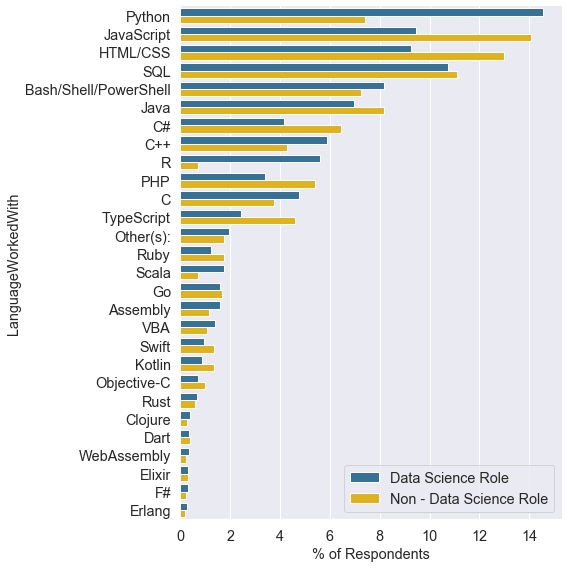

In [41]:
g = sns.catplot(x="Respondent", y="LanguageWorkedWith", hue="RoleCategory", data=langs_data_pivot,
                height=8, kind="bar", palette=colors, aspect=1,legend=False)
plt.legend(loc='best')
g.despine(left=True)
g.set_ylabels("LanguageWorkedWith")
g.set_xlabels("% of Respondents")


# What is the difference in Education qualifications of Data Scientists vs. Non- Data Scientists?

In [42]:
Edu_data = jobs_df[jobs_df.EdLevel.isnull()==False][['Respondent','RoleCategory','EdLevel']]

In [43]:
Edu_data.describe()

,Respondent
count,79760.000000
mean,44433.501918
std,25655.751644
min,2.000000
25%,22201.750000
50%,44441.500000
75%,66649.250000
max,88883.000000


In [44]:
edu_data_split = Edu_data.groupby(['RoleCategory','EdLevel'])['Respondent'].nunique()
edu_data_split = (edu_data_split *100/edu_data_split.groupby(level=0).sum()).reset_index().sort_values('Respondent', ascending = False)

edu_data_split

,RoleCategory,EdLevel,Respondent
10,Non - Data Science Role,"Bachelorâs degree (BA, BS, B.Eng., etc.)",48.121653
3,Data Science Role,"Masterâs degree (MA, MS, M.Eng., MBA, etc.)",36.116779
1,Data Science Role,"Bachelorâs degree (BA, BS, B.Eng., etc.)",35.488934
12,Non - Data Science Role,"Masterâs degree (MA, MS, M.Eng., MBA, etc.)",22.522449
17,Non - Data Science Role,Some college/university study without earning ...,12.582267
4,Data Science Role,"Other doctoral degree (Ph.D, Ed.D., etc.)",12.242976
16,Non - Data Science Role,"Secondary school (e.g. American high school, G...",8.202864
8,Data Science Role,Some college/university study without earning ...,6.608068
7,Data Science Role,"Secondary school (e.g. American high school, G...",5.273897
9,Non - Data Science Role,Associate degree,3.601357


In [45]:
edu_data_splitted_pivot = edu_data_split.pivot_table('Respondent','EdLevel', 'RoleCategory').reset_index().sort_values('Data Science Role', ascending=False)
edu_data_splitted_pivot

RoleCategory,EdLevel,Data Science Role,Non - Data Science Role
3,"Masterâs degree (MA, MS, M.Eng., MBA, etc.)",36.116779,22.522449
1,"Bachelorâs degree (BA, BS, B.Eng., etc.)",35.488934,48.121653
4,"Other doctoral degree (Ph.D, Ed.D., etc.)",12.242976,2.062979
8,Some college/university study without earning ...,6.608068,12.582267
7,"Secondary school (e.g. American high school, G...",5.273897,8.202864
0,Associate degree,1.601005,3.601357
6,"Professional degree (JD, MD, etc.)",1.161513,1.426644
5,Primary/elementary school,0.973160,0.951096
2,I never completed any formal education,0.533668,0.528690


In [46]:

g = sns.catplot(x="Respondent", y="EdLevel", hue="RoleCategory", data= edu_data_pivot,
                 kind="bar", palette=colors, aspect=1, legend = False)
g.despine(left=True)
g.set_ylabels("EdLevel")
plt.legend(loc='best')

g.set_xlabels("% of respondents")


NameError: name 'edu_data_pivot' is not defined

# Do Data Scientists work with other non-degree programs?

In [47]:
print (jobs_df.EduOther.describe())

count                                                 77904
unique                                                  492
top       Taught yourself a new language, framework, or ...
freq                                                   5761
Name: EduOther, dtype: object


In [48]:
OtherEdu_data = jobs_df[jobs_df.EduOther.isnull()==False][['Respondent','RoleCategory','EduOther']]

otheredu_data_splitted = \
(OtherEdu_data.set_index(OtherEdu_data.columns.drop('EduOther',1).tolist())
   .EduOther.str.split(';', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'EduOther'})
   .loc[:, OtherEdu_data.columns]
)


other_edu_data_split = otheredu_data_splitted.groupby(['RoleCategory','EduOther'])['Respondent'].nunique()
other_edu_data_split = (other_edu_data_split *100/other_edu_data_split.groupby(level=0).sum()).reset_index().sort_values('Respondent', ascending = False)

other_edu_data_split

,RoleCategory,EduOther,Respondent
17,Non - Data Science Role,"Taught yourself a new language, framework, or ...",26.051279
8,Data Science Role,"Taught yourself a new language, framework, or ...",23.600838
7,Data Science Role,Taken an online course in programming or softw...,19.359528
16,Non - Data Science Role,Taken an online course in programming or softw...,18.142079
1,Data Science Role,Contributed to open source software,12.997563
14,Non - Data Science Role,Received on-the-job training in software devel...,12.619614
10,Non - Data Science Role,Contributed to open source software,12.481573
5,Data Science Role,Received on-the-job training in software devel...,10.393775
3,Data Science Role,Participated in a hackathon,9.619907
4,Data Science Role,Participated in online coding competitions (e....,9.200906


In [49]:
other_edu_data_splitted_pivot = other_edu_data_split.pivot_table('Respondent','EduOther', 'RoleCategory').reset_index().sort_values('Data Science Role', ascending=False)
other_edu_data_splitted_pivot

RoleCategory,EduOther,Data Science Role,Non - Data Science Role
8,"Taught yourself a new language, framework, or ...",23.600838,26.051279
7,Taken an online course in programming or softw...,19.359528,18.142079
1,Contributed to open source software,12.997563,12.481573
5,Received on-the-job training in software devel...,10.393775,12.619614
3,Participated in a hackathon,9.619907,7.878951
4,Participated in online coding competitions (e....,9.200906,7.579011
6,Taken a part-time in-person course in programm...,6.148189,5.652837
2,Participated in a full-time developer training...,4.437984,4.819908
0,Completed an industry certification program (e...,4.241310,4.774747


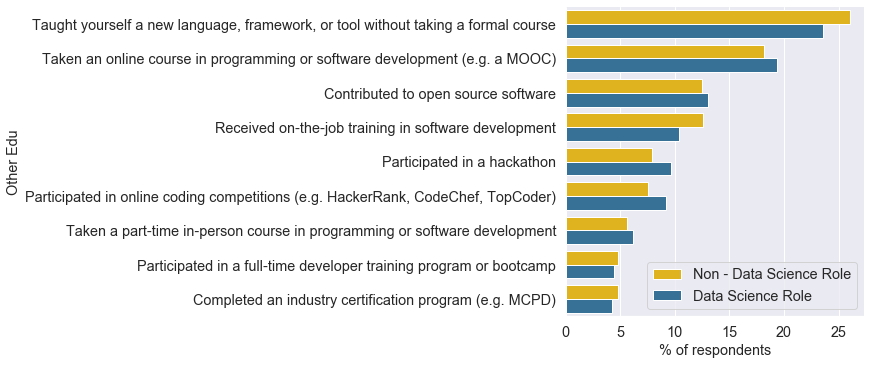

In [50]:
g = sns.catplot(x="Respondent", y="EduOther", hue="RoleCategory", data= other_edu_data_split,
                 kind="bar", palette=colors, aspect=1, legend = False)
plt.legend(loc='best')
g.despine(left=True)
g.set_ylabels("Other Edu")
g.set_xlabels("% of respondents")


# What employement types are data scientists interested in?

In [51]:
Emp_data = jobs_df[jobs_df.Employment.isnull()==False][['Respondent','RoleCategory','Employment']]

In [52]:
emp_data_split = Emp_data.groupby(['RoleCategory','Employment'])['Respondent'].nunique()
emp_data_split = (emp_data_split *100/emp_data_split.groupby(level=0).sum()).reset_index().sort_values('Respondent', ascending = False)

emp_data_split

,RoleCategory,Employment,Respondent
4,Non - Data Science Role,Employed full-time,78.118197
0,Data Science Role,Employed full-time,72.770898
2,Data Science Role,"Independent contractor, freelancer, or self-em...",11.377709
6,Non - Data Science Role,"Independent contractor, freelancer, or self-em...",10.150250
3,Data Science Role,"Not employed, but looking for work",8.328173
1,Data Science Role,Employed part-time,7.523220
7,Non - Data Science Role,"Not employed, but looking for work",6.544240
5,Non - Data Science Role,Employed part-time,5.187312


In [53]:
emp_data_splitted_pivot = emp_data_split.pivot_table('Respondent','Employment', 'RoleCategory').reset_index().sort_values('Data Science Role', ascending=False)
emp_data_splitted_pivot

RoleCategory,Employment,Data Science Role,Non - Data Science Role
0,Employed full-time,72.770898,78.118197
2,"Independent contractor, freelancer, or self-em...",11.377709,10.150250
3,"Not employed, but looking for work",8.328173,6.544240
1,Employed part-time,7.523220,5.187312


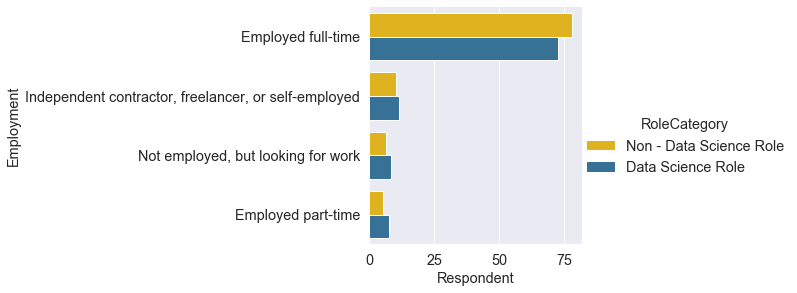

In [54]:
g = sns.catplot(x="Respondent", y="Employment", hue="RoleCategory", data= emp_data_split,
                height=4, kind="bar", palette=colors, aspect= 1)

g.despine(left=True)
g.set_ylabels("Employment")

# Do data scientists have more coding experience than non data scientists?

In [55]:
jobs_df['YearsCodeCategory'] = pd.cut(x=jobs_df.replace('Less than 1 year','0').replace('More than 50 years','50')['YearsCode'].astype(float), bins=[0, 1, 5 ,10, 15, 20, 25, 30, 35, 40, 45, 50])
jobs_df['YearsCodeCategory'].value_counts()

(5, 10]     25375
(1, 5]      18757
(10, 15]    13516
(15, 20]     9246
(20, 25]     4682
(25, 30]     2920
(30, 35]     2051
(35, 40]     1491
(0, 1]       1393
(40, 45]      401
(45, 50]      174
Name: YearsCodeCategory, dtype: int64

In [56]:
exp_data = jobs_df[jobs_df.YearsCodeCategory.isnull()==False][['Respondent','RoleCategory','YearsCodeCategory']]
exp_data_split = exp_data.groupby(['RoleCategory','YearsCodeCategory'])['Respondent'].nunique()
exp_data_split = (exp_data_split *100/exp_data_split.groupby(level=0).sum()).reset_index().sort_values('Respondent', ascending = False)

exp_data_split


,RoleCategory,YearsCodeCategory,Respondent
13,Non - Data Science Role,"(5, 10]",31.745644
2,Data Science Role,"(5, 10]",31.378391
1,Data Science Role,"(1, 5]",25.043124
12,Non - Data Science Role,"(1, 5]",23.306034
14,Non - Data Science Role,"(10, 15]",16.929471
3,Data Science Role,"(10, 15]",16.481104
15,Non - Data Science Role,"(15, 20]",11.673390
4,Data Science Role,"(15, 20]",10.208562
16,Non - Data Science Role,"(20, 25]",5.884909
5,Data Science Role,"(20, 25]",5.472793


In [57]:
exp_data_splitted_pivot = exp_data_split.pivot_table('Respondent','YearsCodeCategory', 'RoleCategory').reset_index().sort_values('YearsCodeCategory', ascending=True)
exp_data_splitted_pivot

RoleCategory,YearsCodeCategory,Data Science Role,Non - Data Science Role
0,"(0, 1]",1.427003,1.768325
1,"(1, 5]",25.043124,23.306034
2,"(5, 10]",31.378391,31.745644
3,"(10, 15]",16.481104,16.929471
4,"(15, 20]",10.208562,11.673390
5,"(20, 25]",5.472793,5.884909
6,"(25, 30]",4.061471,3.614065
7,"(30, 35]",3.120590,2.515313
8,"(35, 40]",1.881763,1.862038
9,"(40, 45]",0.580210,0.494370


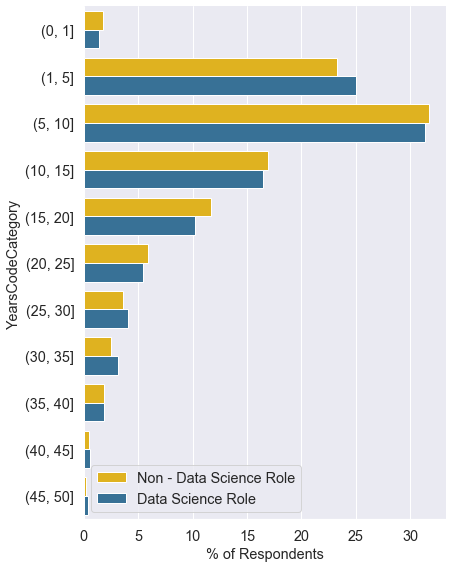

In [58]:
g = sns.catplot(x="Respondent", y="YearsCodeCategory", hue="RoleCategory", data= exp_data_split,
                height=8, kind="bar", palette=colors, aspect= 0.8, legend=False)

g.despine(left=True)
plt.legend(loc='best')
g.set_ylabels("YearsCodeCategory")
g.set_xlabels("% of Respondents")

# Do data scientists feel they are competent enough with the experience they have?

In [59]:
comp_data = jobs_df[jobs_df.ImpSyn.isnull()==False][['Respondent','RoleCategory','ImpSyn']]
comp_data_split = comp_data.groupby(['RoleCategory','ImpSyn'])['Respondent'].nunique()
comp_data_split = (comp_data_split *100/comp_data_split.groupby(level=0).sum()).reset_index().sort_values('Respondent', ascending = False)

comp_data_split


,RoleCategory,ImpSyn,Respondent
5,Non - Data Science Role,A little above average,45.355485
0,Data Science Role,A little above average,43.278986
3,Data Science Role,Far above average,27.228261
7,Non - Data Science Role,Average,24.218486
8,Non - Data Science Role,Far above average,20.980235
2,Data Science Role,Average,20.126812
6,Non - Data Science Role,A little below average,7.357145
1,Data Science Role,A little below average,6.793478
4,Data Science Role,Far below average,2.572464
9,Non - Data Science Role,Far below average,2.088648


In [60]:
comp_data_splitted_pivot = comp_data_split.pivot_table('Respondent','ImpSyn', 'RoleCategory').reset_index().sort_values('Data Science Role', ascending=False)
comp_data_splitted_pivot

RoleCategory,ImpSyn,Data Science Role,Non - Data Science Role
0,A little above average,43.278986,45.355485
3,Far above average,27.228261,20.980235
2,Average,20.126812,24.218486
1,A little below average,6.793478,7.357145
4,Far below average,2.572464,2.088648


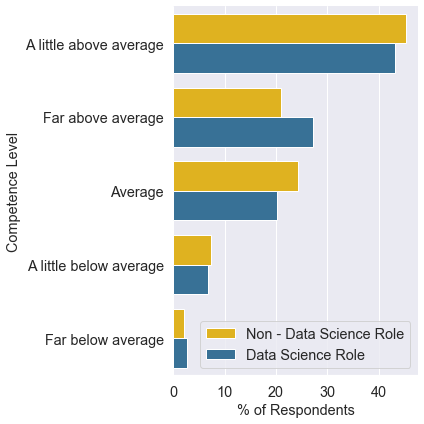

In [61]:
g = sns.catplot(x="Respondent", y="ImpSyn", hue="RoleCategory", data= comp_data_split
             , kind="bar", palette=colors, aspect= 1, legend=False, height=6)
plt.legend(loc='best')
g.despine(left=True)
g.set_ylabels("Competence Level")
g.set_xlabels("% of Respondents")

In [62]:
jobs_df.groupby('RoleCategory').WorkWeekHrs.value_counts(normalize=True)

RoleCategory             WorkWeekHrs
Data Science Role        40.0           0.402051
                         45.0           0.108513
                         50.0           0.097846
                         35.0           0.046974
                         60.0           0.038154
                                          ...   
Non - Data Science Role  475.0          0.000017
                         1012.0         0.000017
                         3875.0         0.000017
                         4125.0         0.000017
                         4850.0         0.000017
Name: WorkWeekHrs, Length: 294, dtype: float64